


# Vamos encher o carrinho!

# Introdução

O Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido no supermercado e depois receber sua compra, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos foi modificado a partir do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar seus dados e fazer AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número que identifica cada pedido de forma exclusiva
    - `'user_id'`: é o número de identificação exclusivo da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto exclusivo que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    - `'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número que identifica cada pedido de forma exclusiva
    -	`'product_id'`: é o número de identificação exclusivo de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    -	`'aisle'`: é o nome do corredor



-	`departments.csv`
    -	`'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

In [14]:
# Importe as bibliotecas

import pandas as pd

In [ ]:
df_instacart_orders = pd.read_csv('../datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('../datasets/products.csv', sep=';')
df_aisles = pd.read_csv('../datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('../datasets/departments.csv', sep=';')
df_order_products = pd.read_csv('../datasets/order_products.csv', sep=';')

In [16]:
# imprima as informações sobre o DataFrame 

df_instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [17]:
# imprima as informações sobre o DataFrame

df_products.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [18]:
# imprima as informações sobre o DataFrame

df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [19]:
# imprima as informações sobre o DataFrame

df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [20]:
# imprima as informações sobre o DataFrame

df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [21]:
#Código gerado pela revisora -  Perceba o número de linhas antes do processamento

len(df_instacart_orders)

478967

## Conclusões

Visão geral dos dados.

* df_instacart: tem 478.967 linhas e 6 colunas. A coluna ['days_since_prior_order'] merece atençao, pois ela possui 28.819 valores ausentes, o que representa cerca de 6% dos dados.

* product_name: tem 49.694 linhas, 4 colunas e 1.258 valores ausentes, representando cerca de 2,5% dos dados. A quantidade de dados ausentes não é muito alta, mas acredito que vale a pena verificar por que alguns produtos não possuem nome.

* df_order_products: tem 4.545.007 linhas e 4 colunas. A coluna add_to_cart_order tem 836 valores ausentes (aproximadamente 0,02%), muito pouco pela quantidade de dados existente.

* df_aisles: com 134 linhas e 2 colunas e df_departments: com 21 linhas e 2 colunas nao possuem valores ausentes.

* Tipos de datos: Não há nenhuma coluna com tipo de dado incorreto em nenhum dos DataFrames. Todos os tipos de dados parecem estar adequados para o tipo de informação que cada coluna contém.

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Preparação de dados

 * Verificar e corrigir os tipos de dados:
* Preencher ou remover valores ausentes:
days_since_prior_order (df_instacart): Preencher com a mediana acredito ser a melhor opçāo, devido a possíveis valores extremos, mas de toda forma irei fazer o test com a média e ver qual melhor se aplica neste caso.

* product_name (df_products): Remover linhas com valores ausentes, pois são apenas 2,5% dos dados e isso não deve impactar negativamente a análise. A segunda opçāo caso seja necessário manter esses registros, podemos usar o valor 'unknown'.

* add_to_cart_order (df_order_products): Remover linhas com valores ausentes.


 * Valores Duplicados:
* Remover duplicatas: É importante garantir que não haja duplicatas, principalmente nas colunas-chave (IDs), como order_id, user_id, product_id, para que a análise não seja distorcida. A duplicação pode ocorrer por erro ou por transações registradas várias vezes.

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `instacart_orders`

In [22]:
# Verificar se há pedidos duplicados

duplicated_count = df_instacart_orders.duplicated().sum()

print(f'Número de linhas duplicadas: {duplicated_count}')

df_instacart_orders[df_instacart_orders.duplicated()]

Número de linhas duplicadas: 15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


Há linhas duplicadas? Se sim, o que elas têm em comum?

* Temos 15 linhas duplicadas e o que elas tem incomum sāo todos os pedidos feitos às 2h da manhã nas quartas-feiras.


In [23]:
# Com base nas suas conclusões,

# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras

df_instacart_filtered = df_instacart_orders[(df_instacart_orders['order_hour_of_day'] == 2) & (df_instacart_orders['order_dow'] == 3)]

duplicated_rows = df_instacart_filtered[df_instacart_filtered.duplicated()]
duplicated_rows

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


O que esse resultado quer dizer?

* Os pedidos feitos às 2h da manhã nas quartas-feiras estão sendo duplicados.

In [24]:
# Remova pedidos duplicados

df_instacart_orders = df_instacart_orders.drop_duplicates() 

In [25]:
#Código gerado pela revisora -  Perceba o número de linhas depois do processamento
len(df_instacart_orders)

478952

In [26]:
# Verifique as linhas duplicadas mais uma vez

duplicated_count = df_instacart_orders.duplicated().sum()

print(f'Número de linhas duplicadas: {duplicated_count}')

Número de linhas duplicadas: 0


In [27]:
# Verifique novamente apenas os IDs de pedidos duplicados

ids_duplicated = df_instacart_orders[df_instacart_orders[['order_id', 'user_id']].duplicated()]
ids_duplicated[ids_duplicated.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order



Descreva brevemente suas conclusões e o que você fez com elas.

* Foram encontradas 15 linhas duplicadas no conjunto de dados.
* Os pedidos feitos às 2h da manhã nas quartas-feiras estão sendo duplicados.
* Utilizei a funçāo drop_duplicates para remover as linhas duplicadas.
* Por ultimo verifiquei se ainda existia alguma linha duplicada, para assim garantir que o dataframe ficou livre de duplicados.


### DataFrame `products`

In [28]:
# Verifique se há linhas completamente duplicadas

duplicated_products = df_products.duplicated().sum()
print(f'Número de linhas duplicadas: {duplicated_products}')

Número de linhas duplicadas: 0


In [29]:
# Verifique apenas IDs dos produtos duplicados

duplicated_count = df_products[['product_id', 'aisle_id']].duplicated().sum()
print(f'Número de combinações duplicadas de product_id e aisle_id: {duplicated_count}')

Número de combinações duplicadas de product_id e aisle_id: 0


In [30]:
# Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)

df_products['product_name'] = df_products['product_name'].str.lower()

duplicated_count = df_products['product_name'].duplicated().sum()
print(f'Número de linhas duplicadas: {duplicated_count}')

Número de linhas duplicadas: 1361


In [31]:
# Verifique os nomes de produtos duplicados que não estão faltando

duplicated_products = df_products[df_products['product_name'].notna() & df_products['product_name'].duplicated()]
print(duplicated_products)

       product_id                                     product_name  aisle_id  \
2058         2059                                  biotin 1000 mcg        47   
5455         5456                 green tea with ginseng and honey        96   
5558         5559                           cream of mushroom soup        69   
7558         7559                        cinnamon rolls with icing       105   
9037         9038                           american cheese slices        21   
...           ...                                              ...       ...   
49689       49690                    high performance energy drink        64   
49690       49691                    original pancake & waffle mix       130   
49691       49692  organic instant oatmeal light maple brown sugar       130   
49692       49693                           spring water body wash       127   
49693       49694                          burrito- steak & cheese        38   

       department_id  
2058            

Descreva brevemente suas conclusões e o que você fez com elas.

* Linhas duplicadas: Verifiquei registros completamente iguais utilizando .duplicated(), e o resultado foi 0, indicando que não há duplicatas completas no DataFrame.
* Combinações duplicadas de product_id e aisle_id: Analisei combinações específicas dessas colunas, e todas as combinações são únicas.
* Nomes de produtos duplicados: Optei por modificar o DataFrame original com .str.lower() para uniformizar os nomes e reduzir possíveis erros durante análises futuras. Após isso, obtive o resultado que 1361 linhas estāo duplicadas com nomes de produtos repetidos.
* Nomes duplicados não nulos: Filtrei nomes não nulos e verifiquei duplicações, identifiquei 104 produtos duplicados que possuem nomes válidos (não ausentes).

### DataFrame `departments`

In [32]:
# Verifique se há linhas completamente duplicadas

duplicated_departments = df_departments.duplicated().sum()
print(f'Número de linhas duplicadas: {duplicated_departments}')

Número de linhas duplicadas: 0


In [33]:
# Verifique apenas se há IDs dos produtos duplicados

id_duplicated = df_departments['department_id'].duplicated().sum()
print(f'Número de linhas duplicadas: {id_duplicated}')

Número de linhas duplicadas: 0


Descreva brevemente suas conclusões e o que você fez com elas.

* Linhas completamente duplicadas: Usei .duplicated() para verificar se havia registros completamente iguais no DataFrame df_departments. O resultado foi 0, indicando que não existem duplicatas completas.
* IDs de produtos duplicados: Verifiquei duplicações na coluna department_id usando .duplicated().sum(). O resultado foi 0, mostrando que todos os IDs de departamentos são únicos.

### DataFrame `aisles`

In [34]:
# Verifique se há linhas completamente duplicadas

duplicated_aisle = df_aisles.duplicated().sum()
print(f'Número de linhas duplicadas: {duplicated_aisle}')

Número de linhas duplicadas: 0


In [35]:
# Verifique apenas se há IDs dos produtos duplicados

id_duplicated = df_aisles['aisle_id'].duplicated().sum()
print(f'Número de linhas duplicadas: {id_duplicated}')

Número de linhas duplicadas: 0


Descreva brevemente suas conclusões e o que você fez com elas.

* Verifiquei linhas completamente duplicadas:
Usei o código df_aisles.duplicated().sum() para verificar se havia linhas duplicadas no DataFrame df_aisles. O resultado foi 0, o que significa que não há registros idênticos no DataFrame.
* Verifiquei se havia IDs duplicados na coluna aisle_id:
Apliquei o código df_aisles['aisle_id'].duplicated().sum() para contar se algum ID de corredor (aisle_id) se repete no DataFrame. O resultado foi 0, indicando que todos os IDs são únicos.

### DataFrame `order_products`

In [36]:
# Verifique se há linhas completamente duplicadas

duplicated_order = df_order_products.duplicated().sum()
print(f'Número de linhas duplicadas: {duplicated_order}')

Número de linhas duplicadas: 0


In [37]:
# Verifique mais uma vez se há outros casos complicados de duplicados

duplicated_combinations = df_order_products.duplicated(subset=['order_id', 'product_id']).sum()
print(f'Número de duplicados em combinações de order_id e product_id: {duplicated_combinations}')

Número de duplicados em combinações de order_id e product_id: 0


Descreva brevemente suas conclusões e o que você fez com elas.

* Verifiquei se há linhas completamente duplicadas:
Usei o código df_order_products.duplicated().sum() para contar quantas linhas duplicadas existiam no DataFrame df_order_products. O resultado foi 0, indicando que não há registros completamente duplicados.
* Verifiquei duplicações em combinações de order_id e product_id:
Apliquei o código df_order_products.duplicated(subset=['order_id', 'product_id']).sum() para identificar se havia repetições de combinações específicas de order_id e product_id. O resultado foi 0, mostrando que não há duplicações dessas combinações.

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [38]:
# Encontre valores ausentes na coluna 'product_name'

missing_values = df_products['product_name'].isna().sum()
print(f'Número de valores ausentes na coluna "product_name": {missing_values}')

Número de valores ausentes na coluna "product_name": 1258


Descreva brevemente suas conclusões.

* Verifiquei a presença de valores ausentes na coluna 'product_name' do DataFrame df_products e obtvemos o resultado de 1258 valores ausentes na coluna 'product_name'.

In [39]:
# Todos os nomes de produtos ausentes estão associados com o corredor de ID 100?

missing_aisle_100 = df_products[df_products['product_name'].isna() & (df_products['aisle_id'] == 100)]
missing_aisle_100

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Descreva brevemente suas conclusões.

* Verifiquei se todos os nomes de produtos ausentes estavam associados ao corredor de ID 100, desta forma podemos ver que 1258 linhas com nomes de produtos ausentes no corredor de ID 100. Ou seja, todos os produtos ausentes estão, de fato, associados ao corredor 100.

In [40]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?

department_missing_products = df_products[df_products['product_name'].isna() & (df_products['department_id'] == 21)]
department_missing_products

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Descreva brevemente suas conclusões.

* Obtive 1258 linhas com nomes de produtos ausentes no departamento de ID 21. Isso significa que todos os produtos ausentes de product_name no seu DataFrame estão associados ao departamento 21.

In [41]:
# Use as tabelas department e aisle para verificar os dados do corredor com ID 100 e do departamento com ID 21.

aisle_data_100 = df_aisles[df_aisles['aisle_id'] == 100]
print(aisle_data_100)

department_data_21 = df_departments[df_departments['department_id'] == 21]
print(department_data_21)

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Descreva brevemente suas conclusões.

* O corredor com ID 100 tem o valor "missing" na coluna aisle.
* O departamento com ID 21 tem o valor "missing" na coluna department.

In [42]:
# Preencha nomes de produtos ausentes com 'Unknown'

df_products['product_name'] = df_products['product_name'].fillna('Unknown')
missing_value_after = df_products['product_name'].isna().sum()
print(f'Número de valores ausentes após preenchimento: {missing_value_after}')

Número de valores ausentes após preenchimento: 0


Descreva brevemente suas conclusões e o que você fez com elas.

* Preenchi os valores ausentes na coluna product_name do DataFrame df_products com o valor 'Unknown' usando a funçao fillna().
* O número de valores ausentes após o preenchimento foi 0, indicando que todos os valores ausentes foram substituídos por 'Unknown'.

### DataFrame `orders`

In [43]:
# Encontre os valores ausentes

missing_order = df_instacart_orders.isna().sum()
missing_order

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [44]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?

not_first_order_missing = df_instacart_orders[df_instacart_orders['days_since_prior_order'].isna() & (df_instacart_orders['order_number'] > 1)]

print(f'Número de valores ausentes para clientes que não estão fazendo o primeiro pedido: {len(not_first_order_missing)}')

Número de valores ausentes para clientes que não estão fazendo o primeiro pedido: 0


Descreva brevemente suas conclusões e o que você fez com elas.

* Identifiquei os valores ausentes no DataFrame. Apenas a coluna days_since_prior_order possui 28817 valores ausentes, enquanto as demais colunas não apresentam ausências.
* Analisei se os valores ausentes em days_since_prior_order estão associados a pedidos além do primeiro. O resultado mostrou que nenhum cliente com pedidos subsequentes tem valores ausentes, confirmando que as ausências ocorrem apenas no primeiro pedido.

### DataFrame `order_products`

In [45]:
# Encontre os valores ausentes

missing_order_product = df_order_products.isna().sum()
missing_order_product

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [46]:
# Quais são os valores mínimo e máximo dessa coluna?

min_value = df_order_products['add_to_cart_order'].min()
max_value = df_order_products['add_to_cart_order'].max()

print(f'Valor mínimo: {min_value}')
print(f'Valor maxímo: {max_value}')

Valor mínimo: 1.0
Valor maxímo: 64.0


Descreva brevemente suas conclusões.

* Primeiro, verifiquei a tabela df_order_products para encontrar valores ausentes. Identifiquei que apenas a coluna add_to_cart_order tem valores ausentes, totalizando 836 valores ausentes. 
* Encontrei os valores mínimo e máximo da coluna add_to_cart_order:
Valor mínimo: 1.0
Valor máximo: 64.0
Esses valores indicam que a posição do primeiro item adicionado ao carrinho começa em 1 e o número máximo de itens adicionados em um pedido foi 64. Isso mostra a variação no número de produtos por pedido, com alguns pedidos contendo uma quantidade considerável de itens no carrinho.

In [47]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'

missing_add_to_cart_order = df_order_products[df_order_products['add_to_cart_order'].isna()]
order_ids_with_missing = missing_add_to_cart_order['order_id'].unique()
order_ids_with_missing

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [48]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?

missing_add_to_cart_order = df_order_products[df_order_products['add_to_cart_order'].isna()]

# Agrupe os pedidos com dados ausentes por ID de pedido

product_count_per_order = missing_add_to_cart_order.groupby('order_id')['product_id'].count()

over_64_products = product_count_per_order[product_count_per_order > 64]
print(f"Pedidos com mais de 64 produtos (com valores ausentes em 'add_to_cart_order'):{over_64_products}")

# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem

min_product_count = product_count_per_order.min()
print(f'Número mínimo de produtos em pedidos com dados ausentes: {min_product_count}')

Pedidos com mais de 64 produtos (com valores ausentes em 'add_to_cart_order'):Series([], Name: product_id, dtype: int64)
Número mínimo de produtos em pedidos com dados ausentes: 1


Descreva brevemente suas conclusões.

* Primeiramente, filtrei todos os pedidos em que a coluna 'add_to_cart_order' contém valores ausentes. Em seguida, agrupei esses pedidos pelo ID de pedido e contei o número de produtos em cada um. Depois, verifiquei quais desses pedidos tinham mais de 64 produtos, com base na contagem obtida. A verificação revelou que não existem pedidos com mais de 64 produtos que tenham valores ausentes na coluna 'add_to_cart_order'. Isso significa que todos os pedidos com valores ausentes possuem 64 produtos ou menos.
* Por fim, eu verifiquei quantos produtos, no mínimo, estavam presentes em pedidos com valores ausentes na coluna 'add_to_cart_order'. Isso me ajudou a entender melhor como os pedidos com dados ausentes estão distribuídos em relação à quantidade de produtos. O número mínimo de produtos nesses pedidos foi 1.


In [49]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer

df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)


df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)
print(df_order_products['add_to_cart_order'].dtype)

int64


Descreva brevemente suas conclusões e o que você fez com elas.

* Substituí os valores ausentes na coluna 'add_to_cart_order' por 999 usando a funçāo fillna() e converti a coluna para o tipo integer, garantindo que todos os valores ausentes fossem preenchidos e a coluna tivesse o formato correto para análise.

## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados

* Nesta segunda etapa realizei várias tarefas importantes para garantir que o conjunto de dados estivesse pronto para a análise. Primeiramente, verifiquei a presença de valores ausentes e duplicados em diferentes colunas, identificando e tratando dados faltantes, como os valores ausentes na coluna 'product_name', substituindo-os por 'Unknown'. Além disso, analisei os pedidos com valores ausentes na coluna 'add_to_cart_order', substituindo-os por 999, e também converti a coluna para o tipo integer. A preparação dos dados também envolveu a verificação de inconsistências em combinações de produtos e seus IDs, assegurando a integridade dos dados antes da análise. Dessa forma, obtive um conjunto de dados mais limpo, sem valores ausentes ou inconsistentes, o que facilita as etapas subsequentes da análise.

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos a cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [50]:
unique_hours = df_instacart_orders['order_hour_of_day'].unique()
print(f'Valores únicos em order_hour_of_day: {sorted(unique_hours)}')

Valores únicos em order_hour_of_day: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23)]


In [51]:
unique_days = df_instacart_orders['order_dow'].unique()
print(f'Valores únicos em order_dow: {sorted(unique_days)}')

Valores únicos em order_dow: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]


Escreva suas conclusões aqui

* Verifiquei os valores únicos da coluna order_hour_of_day e confirmei que estão dentro do intervalo esperado (0 a 23).
* Fiz o mesmo para order_dow e os valores variam corretamente entre 0 e 6. Portanto, os dados parecem estar corretos.

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

In [52]:
#Código gerado pela revisora 
df_instacart_orders

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478962,3210681,5617,5,1,14,7.0
478963,3270802,112087,2,3,13,6.0
478964,885349,82944,16,2,11,6.0
478965,216274,4391,3,3,8,8.0


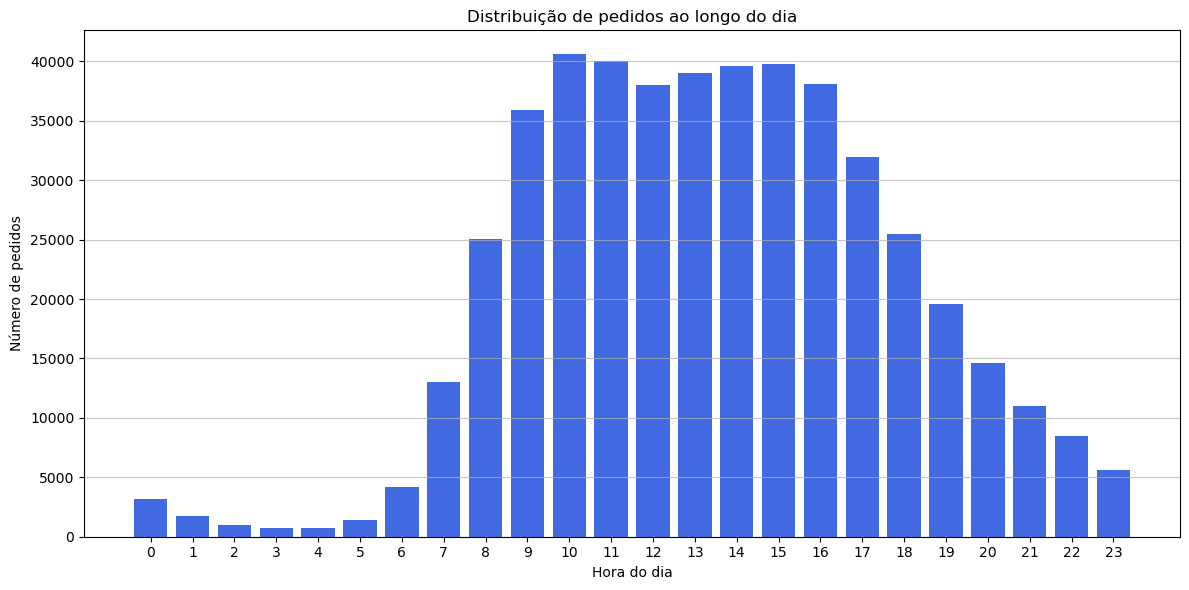

In [53]:
import matplotlib.pyplot as plt
order_hour_counts = df_instacart_orders['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(order_hour_counts.index, order_hour_counts.values, color='royalblue')
plt.xlabel('Hora do dia')
plt.ylabel('Número de pedidos')
plt.title('Distribuição de pedidos ao longo do dia')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()

plt.show()

Escreva suas conclusões aqui

* Criei um gráfico de barras para visualizar quantas pessoas fazem pedidos em cada hora do dia. Primeiro, contei quantos pedidos foram feitos em cada horário e organizei os valores em ordem crescente. Depois, configurei o gráfico com rótulos nos eixos, um título e uma grade para facilitar a leitura.

* O gráfico mostra a distribuição de pedidos ao longo do dia. Os pedidos são mais frequentes entre 9h e 16h, com um pico por volta das 10h-11h. Durante a madrugada (0h-6h), o volume de pedidos é significativamente menor. Essa análise ajuda a entender os horários de maior demanda, o que pode ser útil para otimizar a logística e os tempos de entrega.

### [A3] Em que dia da semana as pessoas compram produtos alimentícios?

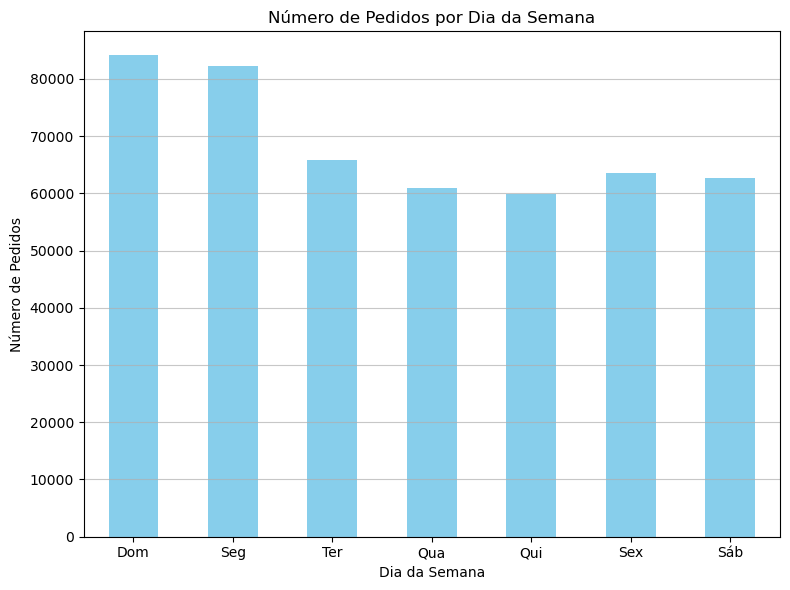

In [54]:
import matplotlib.pyplot as plt
order_counts = df_instacart_orders['order_dow'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
order_counts.plot(kind='bar', color='skyblue')
plt.title('Número de Pedidos por Dia da Semana',)
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Pedidos')
plt.xticks(ticks=range(7), labels=['Dom', 'Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb'], rotation=0)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()

plt.show()



Escreva suas conclusões aqui

* Criei um gráfico de barras para mostrar a distribuição dos pedidos por dia da semana. Após contar o número de pedidos em cada dia, o gráfico revelou que o maior volume de pedidos ocorre no domingo e na segunda-feira, ambos com mais de 80.000 pedidos. Terça e quarta-feira têm menos pedidos, enquanto quinta, sexta e sábado apresentam uma quantidade intermediária. Esses dados indicam que as pessoas fazem mais compras no início da semana, possivelmente para abastecer a casa após o fim de semana.

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Escreva suas conclusões aqui

* O histograma mostra que os clientes da plataforma seguem diferentes padrões de recompra. A maioria dos pedidos ocorre dentro de um intervalo de 3 a 7 dias, sugerindo um ciclo semanal de compras. No entanto, um número significativo de usuários também faz pedidos após 30 dias, possivelmente indicando um comportamento de compras mensais. Isso pode estar relacionado a pedidos maiores e planejados para o mês.
* Usei dropna() para remover os valores ausentes (NaN), garantindo que o histograma não fosse distorcido por dados incompletos.
* Defini bins=50 para proporcionar uma boa granularidade na distribuição dos tempos de espera, permitindo uma visualização detalhada.

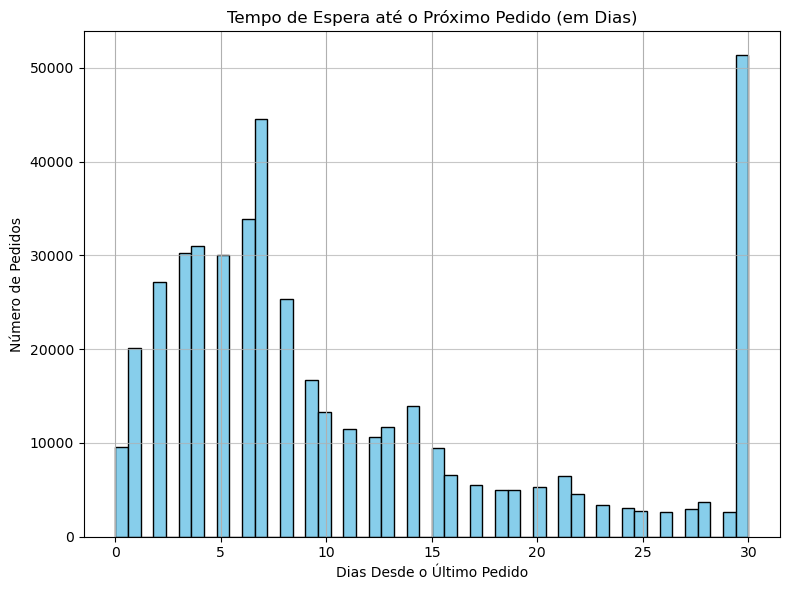

(0.0, 30.0)

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df_instacart_orders['days_since_prior_order'].dropna().hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Tempo de Espera até o Próximo Pedido (em Dias)')
plt.xlabel('Dias Desde o Último Pedido')
plt.ylabel('Número de Pedidos')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()

plt.show()

min_wait_time = df_instacart_orders['days_since_prior_order'].min()
max_wait_time = df_instacart_orders['days_since_prior_order'].max()

min_wait_time, max_wait_time

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

In [56]:
import matplotlib.pyplot as plt
import numpy as np

In [57]:
hours = np.arange(24)

In [58]:
wednesday_orders = df_instacart_orders[df_instacart_orders['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()
saturday_orders = df_instacart_orders[df_instacart_orders['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()

wednesday_orders = wednesday_orders.reindex(hours, fill_value=0)
saturday_orders = saturday_orders.reindex(hours, fill_value=0)

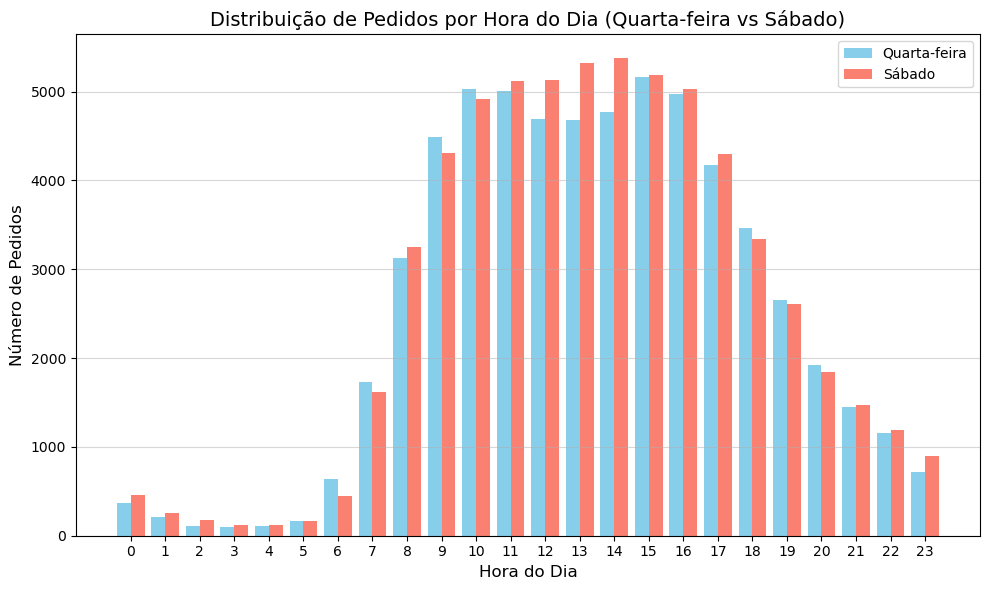

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(hours - 0.2, wednesday_orders, width=0.4, color='skyblue', label='Quarta-feira')
plt.bar(hours + 0.2, saturday_orders, width=0.4, color='salmon', label='Sábado')

plt.title('Distribuição de Pedidos por Hora do Dia (Quarta-feira vs Sábado)', fontsize=14)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Número de Pedidos', fontsize=12)
plt.xticks(hours)
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()

plt.show()

Escreva suas conclusões aqui

* Analisei a distribuição dos pedidos ao longo do dia para as quartas-feiras e sábados. Construí um gráfico de barras comparando os dois dias, ajustando a largura das barras para facilitar a visualização.
* Padrão de crescimento semelhante: Tanto na quarta-feira quanto no sábado, o número de pedidos começa a aumentar significativamente a partir das 6h-7h da manhã, atingindo o pico entre 12h e 14h.
* Sábado tem maior volume de pedidos: Em quase todas as horas do dia, o sábado apresenta um número maior de pedidos do que a quarta-feira, especialmente no período da tarde.
* Pico de pedidos no horário do almoço: O maior volume de pedidos ocorre entre 12h e 14h, sugerindo que a demanda por pedidos pode estar associada ao horário de almoço.
* Queda gradual no período da tarde e noite: Após o pico, os pedidos diminuem progressivamente ao longo da tarde e da noite, mas ainda há uma quantidade relevante de pedidos até por volta das 22h.
* Horários da madrugada com baixa demanda: Entre 0h e 6h, o número de pedidos é muito baixo em ambos os dias, indicando que há pouca atividade nesse período.

### [B2] Qual é a distribuição do número de pedidos por cliente?

In [60]:
import matplotlib.pyplot as plt

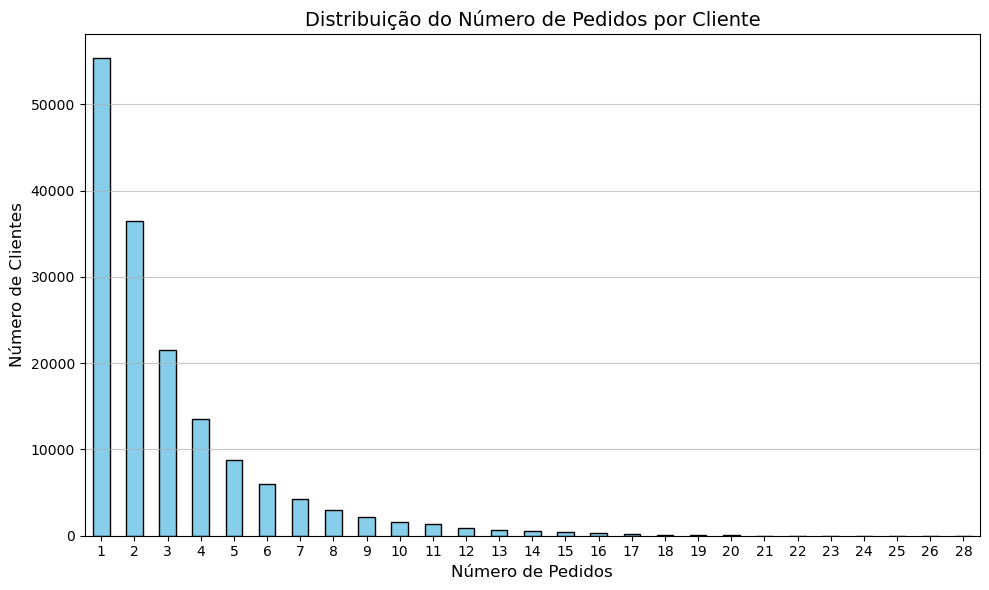

In [61]:
order_counts_per_user = df_instacart_orders.groupby('user_id')['order_id'].count()

order_distribution = order_counts_per_user.value_counts().sort_index()

plt.figure(figsize=(10, 6))
order_distribution.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribuição do Número de Pedidos por Cliente', fontsize=14)
plt.xlabel('Número de Pedidos', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()

plt.show()

Escreva suas conclusões aqui

* Analisei quantos pedidos os clientes fizeram no total. Construí um gráfico de distribuição para entender quantos clientes fizeram apenas 1 pedido, 2 pedidos, 3 pedidos, etc.. 
* A maioria dos clientes faz poucos pedidos: A grande maioria dos clientes realizou apenas um ou dois pedidos, com o número de clientes diminuindo drasticamente à medida que o número de pedidos aumenta.
* Poucos clientes fazem muitos pedidos: Há uma queda exponencial no número de clientes conforme aumenta a quantidade de pedidos. Apenas um pequeno grupo de clientes realiza 10 ou mais pedidos.
* Distribuição de cauda longa: O gráfico segue um padrão típico de cauda longa, indicando que uma minoria dos clientes é responsável por um grande número de pedidos, enquanto a maioria compra poucas vezes.
* Potencial para estratégias de retenção: Como a maioria dos clientes faz poucos pedidos, estratégias para aumentar a retenção e fidelidade podem ser eficazes, como programas de recompensas ou ofertas personalizadas para incentivar mais compras.

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [62]:
import pandas as pd

In [63]:
top_products = df_order_products['product_id'].value_counts().head(20)

top_products = pd.DataFrame({'product_id': top_products.index, 'num_purchases': top_products.values})

In [64]:
top_products = top_products.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')

print(top_products[['product_id', 'product_name', 'num_purchases']])

    product_id              product_name  num_purchases
0        24852                    banana          66050
1        13176    bag of organic bananas          53297
2        21137      organic strawberries          37039
3        21903      organic baby spinach          33971
4        47209      organic hass avocado          29773
5        47766           organic avocado          24689
6        47626               large lemon          21495
7        16797              strawberries          20018
8        26209                     limes          19690
9        27845        organic whole milk          19600
10       27966       organic raspberries          19197
11       22935      organic yellow onion          15898
12       24964            organic garlic          15292
13       45007          organic zucchini          14584
14       39275       organic blueberries          13879
15       49683            cucumber kirby          13675
16       28204        organic fuji apple        

Escreva suas conclusões aqui

* Analisei quais são os 20 produtos mais comprados na plataforma. Para isso, contei a frequência de cada product_id no dataset de pedidos e juntei com a tabela de produtos para obter os nomes. O resultado mostrou que Banana é o produto mais comprado (66.050 compras), seguido por "Bag of Organic Bananas" (53.297 compras). Além disso, percebi que a maioria dos produtos mais vendidos são frutas e orgânicos, o que pode indicar uma forte preferência dos clientes por produtos frescos e saudáveis.

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [65]:
import matplotlib.pyplot as plt

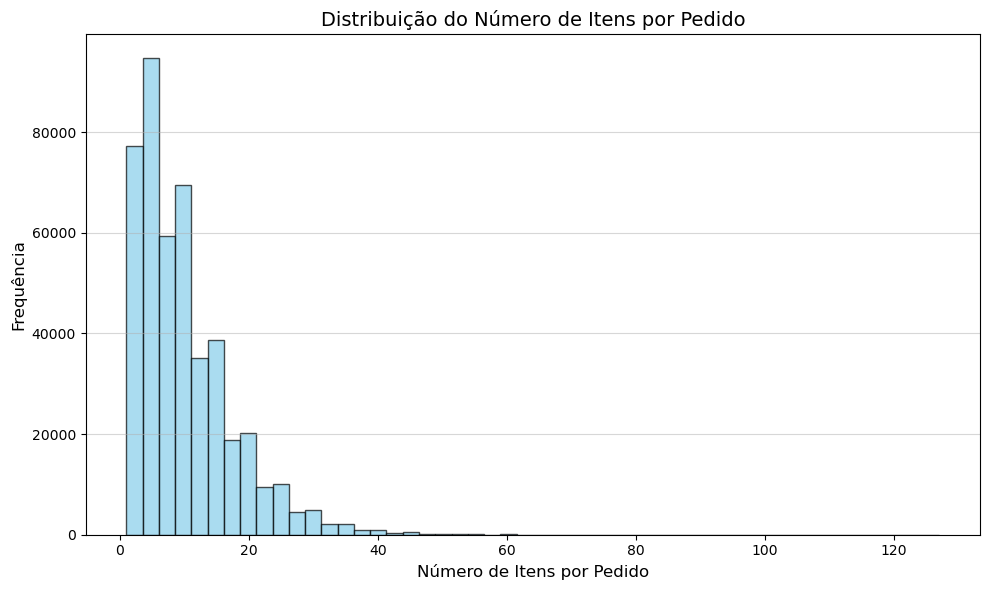

In [66]:
order_sizes = df_order_products.groupby('order_id')['product_id'].count()

plt.figure(figsize=(10, 6))
plt.hist(order_sizes, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribuição do Número de Itens por Pedido", fontsize=14)
plt.xlabel("Número de Itens por Pedido", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()

plt.show()

In [67]:
mean_items = order_sizes.mean()
median_items = order_sizes.median()
mode_items = order_sizes.mode()[0]

print(f"Média de itens por pedido: {mean_items:.2f}")
print(f"Mediana de itens por pedido: {median_items}")
print(f"Moda (valor mais frequente): {mode_items}")

Média de itens por pedido: 10.10
Mediana de itens por pedido: 8.0
Moda (valor mais frequente): 5


Escreva suas conclusões aqui

* Neste exercício, analisei quantos itens os clientes normalmente compram em um único pedido. Para isso, agrupei os pedidos (order_id) e contei a quantidade de produtos (product_id) em cada um.


 * Os resultados mostram que: 
* A média de itens por pedido é 10,10.
* A mediana é 8, indicando que metade dos pedidos contém 8 itens ou menos.
* A moda é 5, ou seja, esse é o número de itens mais frequente nos pedidos.
* A distribuição revelou que a maioria dos clientes faz compras relativamente pequenas, mas existem pedidos maiores que aumentam a média geral. Isso pode indicar que muitos clientes utilizam o serviço para compras menores e recorrentes, em vez de grandes compras semanais.

### [C2] Quais são os 20 principais itens incluídos com mais frequência em pedidos repetidos? Exiba os IDs e nomes.

In [68]:
reordered_products = df_order_products[df_order_products['reordered'] == 1]

In [69]:
top_reordered = reordered_products['product_id'].value_counts().head(20)

In [70]:
top_reordered = top_reordered.reset_index().rename(columns={'index': 'product_id', 'product_id': 'num_reorders'})
top_reordered = top_reordered.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')

KeyError: 'product_id'

In [ ]:
print(top_reordered)

    product_id  num_reorders              product_name
0        24852         55763                    banana
1        13176         44450    bag of organic bananas
2        21137         28639      organic strawberries
3        21903         26233      organic baby spinach
4        47209         23629      organic hass avocado
5        47766         18743           organic avocado
6        27845         16251        organic whole milk
7        47626         15044               large lemon
8        27966         14748       organic raspberries
9        16797         13945              strawberries
10       26209         13327                     limes
11       22935         11145      organic yellow onion
12       24964         10411            organic garlic
13       45007         10076          organic zucchini
14       49683          9538            cucumber kirby
15       28204          8989        organic fuji apple
16        8277          8836  apple honeycrisp organic
17       3

Escreva suas conclusões aqui

* Analisei quais produtos são mais incluídos em pedidos repetidos. Para isso, segui os seguintes passos:

1. Filtrei apenas os produtos que foram reordenados (reordered == 1).

2. Contei quantas vezes cada produto foi reordenado nos pedidos.

3. Ordenei os 20 produtos mais reordenados e juntei com df_products para exibir seus nomes.

* Os resultados mostram que as bananas são o item mais reordenado, seguidas por produtos orgânicos populares, como Bag of Organic Bananas, Organic Strawberries e Organic Baby Spinach. Isso indica que os clientes frequentemente recompõem suas compras com itens frescos e saudáveis.

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

In [ ]:
total_orders = df_order_products['product_id'].value_counts()

reordered_counts = df_order_products[df_order_products['reordered'] == 1]['product_id'].value_counts()

reorder_ratio = (reordered_counts / total_orders).reset_index()
reorder_ratio.columns = ['product_id', 'reorder_ratio']

reorder_ratio = reorder_ratio.merge(df_products[['product_id', 'product_name']], on='product_id', how='left')

reorder_ratio = reorder_ratio.sort_values(by='reorder_ratio', ascending=False)

print(reorder_ratio)

       product_id  reorder_ratio  \
10973       12038            1.0   
1646         1809            1.0   
33130       36122            1.0   
2929         3205            1.0   
38398       41901            1.0   
...           ...            ...   
45543       49663            NaN   
45550       49672            NaN   
45562       49684            NaN   
45565       49687            NaN   
45567       49689            NaN   

                                            product_name  
10973           for women maximum absorbency l underwear  
1646   slow kettle style santa fe chicken enchilada s...  
33130                                  spicy chili beans  
2929             original pure chocolate whippet cookies  
38398   moisturizing lotionized shave gel with vitamin e  
...                                                  ...  
45543  ultra protein power crunch peanut butter n' ho...  
45550                             cafe mocha k-cup packs  
45562          vodka- triple distill

In [ ]:
reorder_ratio['reorder_ratio'] = reorder_ratio['reorder_ratio'].fillna(0)

reorder_ratio = reorder_ratio.sort_values(by='reorder_ratio', ascending=False)

In [ ]:
print(reorder_ratio)

       product_id  reorder_ratio  \
10973       12038            1.0   
38931       42484            1.0   
3599         3930            1.0   
45333       49430            1.0   
45334       49431            1.0   
...           ...            ...   
15037       16442            0.0   
15045       16451            0.0   
15047       16453            0.0   
15052       16458            0.0   
45567       49689            0.0   

                                         product_name  
10973        for women maximum absorbency l underwear  
38931  mocha latte k-cup packs & froth packets coffee  
3599                  original all good lips lip balm  
45333                  cookie con amore jelly cookies  
45334                          pretzels- mighty minis  
...                                               ...  
15037                        14 garden vegetable soup  
15045                  harvest apple meatless sausage  
15047                                original gummies  
15052  

Escreva suas conclusões aqui

* Calculei a proporção de pedidos repetidos para cada produto. Para isso, segui os seguintes passos:

1. Contei o total de pedidos por produto.
2. Conte quantos desses pedidos foram reordenados (reordered == 1).
3. Calculei a proporção de pedidos repetidos (num_reorders / total_orders).
4. Juntei com df_products para obter os nomes dos produtos.
5. Substituí valores NaN por 0.0 para produtos que nunca foram reordenados.

* Os resultados mostraram que alguns produtos possuem 100% de reordenamento, indicando que sempre foram comprados novamente. Por outro lado, vários produtos nunca foram reordenados, sugerindo que podem ser compras únicas ou menos recorrentes.

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

In [ ]:
total_orders_by_user = df_order_products.merge(df_instacart_orders, on='order_id') \
                                       .groupby('user_id')['product_id'].count()


reorders_by_user = df_order_products.merge(df_instacart_orders, on='order_id') \
                                    .query('reordered == 1') \
                                    .groupby('user_id')['product_id'].count()


In [ ]:
reorder_ratio_by_user = (reorders_by_user / total_orders_by_user).reset_index()
reorder_ratio_by_user.columns = ['user_id', 'reorder_ratio']

reorder_ratio_by_user['reorder_ratio'] = reorder_ratio_by_user['reorder_ratio'].fillna(0)

print(reorder_ratio_by_user.head(20))

    user_id  reorder_ratio
0         2       0.038462
1         4       0.000000
2         5       0.666667
3         6       0.000000
4         7       0.928571
5        11       0.200000
6        12       0.250000
7        13       0.565217
8        14       0.360656
9        15       0.538462
10       16       0.531250
11       17       0.716981
12       19       0.291667
13       20       0.000000
14       21       0.400000
15       22       1.000000
16       24       0.500000
17       26       0.437500
18       27       0.658824
19       28       0.500000


Escreva suas conclusões aqui

 * Calculei a proporção de pedidos repetidos para cada cliente. Para isso, segui os seguintes passos:

1. Identifiquei todos os produtos comprados por cada usuário.
2. Conte quantos desses produtos foram reordenados (reordered == 1).
3. Calculei a taxa de reordenamento (num_reorders / total_orders).
4. Substituí NaN por 0.0 para clientes que nunca repetiram compras.


 * Os resultados mostram que:
* Alguns clientes sempre repetem suas compras (reorder_ratio = 1.0).
* Outros nunca repetiram nenhum pedido (reorder_ratio = 0.0).
* A maioria dos usuários tem uma taxa de reordenamento entre 30% e 80%, indicando um comportamento misto entre pedidos novos e repetidos.

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [ ]:
first_added_counts = df_order_products[df_order_products['add_to_cart_order'] == 1] \
                     .groupby('product_id')['product_id'].count() \
                     .sort_values(ascending=False) \
                     .head(20) \
                     .reset_index(name='num_first_added')

In [ ]:
top_first_added = first_added_counts.merge(df_products[['product_id', 'product_name']], on='product_id')

In [ ]:
print(top_first_added)

    product_id  num_first_added                 product_name
0        24852            15562                       banana
1        13176            11026       bag of organic bananas
2        27845             4363           organic whole milk
3        21137             3946         organic strawberries
4        47209             3390         organic hass avocado
5        21903             3336         organic baby spinach
6        47766             3044              organic avocado
7        19660             2336                 spring water
8        16797             2308                 strawberries
9        27966             2024          organic raspberries
10       44632             1914   sparkling water grapefruit
11       49235             1797          organic half & half
12       47626             1737                  large lemon
13         196             1733                         soda
14       38689             1397     organic reduced fat milk
15       26209          

Escreva suas conclusões aqui

* Analisei quais produtos os clientes adicionam primeiro ao carrinho. Para isso, segui os seguintes passos:

1. Filtrei apenas os produtos que foram adicionados primeiro (add_to_cart_order == 1).
2. Conte quantas vezes cada produto apareceu nessa posição.
3. Ordenei os produtos do mais frequente ao menos frequente.
4. Juntei com o dataframe de produtos para obter os nomes correspondentes.


 * Os resultados mostram que:
* Frutas e vegetais orgânicos dominam a lista, como Banana, Bag of Organic Bananas, Organic Strawberries e Organic Baby Spinach.
* Isso indica que muitos clientes priorizam produtos frescos e saudáveis logo no início da compra.
* Além disso, itens com alta recorrência de compra podem ser adicionados primeiro porque já fazem parte da rotina dos consumidores.

# Conclusão geral do projeto:

# Análise de pedidos Instacart.

Neste projeto, realizei uma análise detalhada dos pedidos da Instacart, explorando padrões de compra, comportamento dos clientes e características dos produtos mais populares.

 * A análise revelou padrões importantes sobre o comportamento dos clientes da Instacart. Os principais insights foram:
* Os clientes tendem a realizar pedidos principalmente entre 10h e 11h, com menor atividade na madrugada.
* Domingos e segundas-feiras são os dias de maior movimento.
* A maioria dos clientes segue um ciclo semanal ou mensal de recompra.
* O número de itens por pedido é relativamente baixo, sugerindo compras pequenas e frequentes.
* Frutas e produtos orgânicos dominam as compras e os reordenamentos.

 * Conclusão Final
* Esses insights podem ser utilizados para otimizar a logística, melhorar a experiência do cliente e desenvolver estratégias para aumentar a retenção e a fidelização dos consumidores.